# Variable	- Definition
  survival	        Survival	
  pclass	        Ticket class	
sex	Sex	

Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number


embarked	Port of Embarkation	


C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. 
If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Starting with Python Libraries & Data

### Importing Libraries

In [1]:
# Avoiding Warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

### Reading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Checking Size
print('the shape of train : ', train.shape)
print('the shape of test: ', test.shape)

the shape of train :  (891, 12)
the shape of test:  (418, 11)


In [5]:
# Brief intoduction of train and test data
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

## Data visualization and Analysis

In [6]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing the counts of all columns one by one with conclusion

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Ploting Univariate Plots

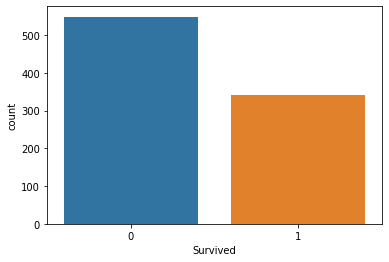

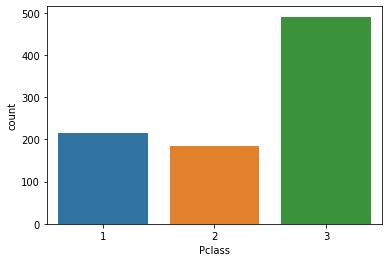

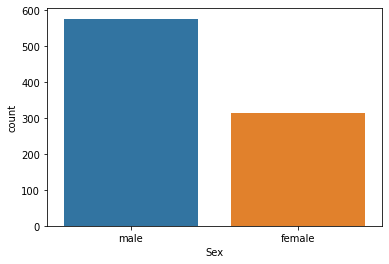

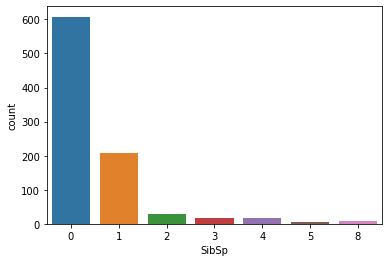

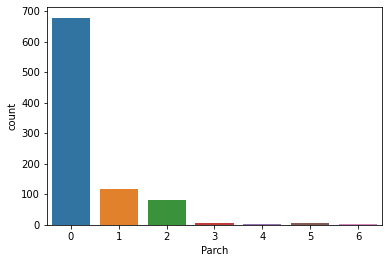

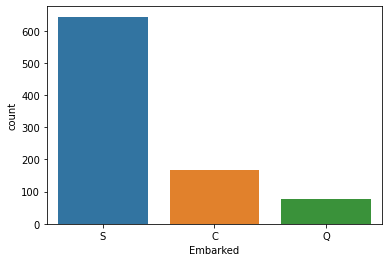

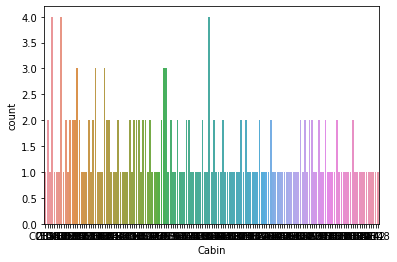

In [8]:
count_plt = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked', 'Cabin']
# Function to plot Count Plot for selected Columns

for i in train[count_plt]:
    sns.countplot(i, data = train)
    plt.show()

###### Survived - 
    Almost 600 people died and only 300 plople Survived in that sink.
###### PClass
    There was only 3 Ticket class, and most of the people with class 3
###### Sex
    Here In can see that most of the passengers was Male
###### SibSp 
    Almost 600 people was alone there 
###### Parch
    Similarly,  more than 600 passengers wan not with their parents or child
###### Embarked
    As the above plot there was only 3 Embarking station, and most of the embarkment done from 'S'

#### Ploting Bi-Variate plots 

In [9]:
bivar_plt = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']

<AxesSubplot:xlabel='Survived', ylabel='count'>

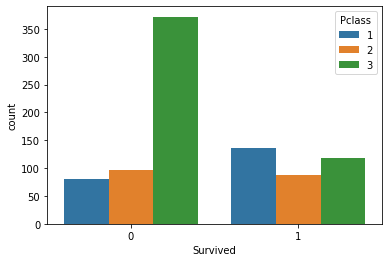

In [10]:
# for Pclass (train)
sns.countplot('Survived', hue = 'Pclass', data = train)

It shows that most of the pessengers who were the part of class 3 were died. 

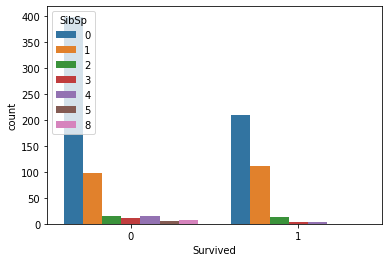

In [11]:
# for SibSp (train)
sns.countplot('Survived', hue = 'SibSp', data = train)
plt.show()

This plot shows that count of died male is huge as compare to died female, and count of Survived male is lesser than survived female

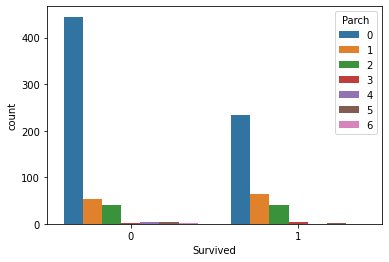

In [12]:
# for Parch (train)
sns.countplot('Survived', hue = 'Parch', data = train)
plt.show()

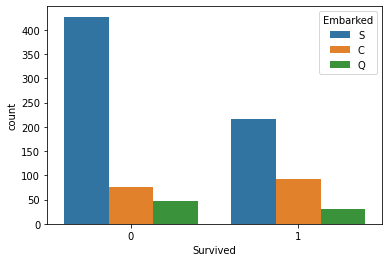

In [13]:
# for Embarked (train)
sns.countplot('Survived', hue = 'Embarked', data = train)
plt.show()

#### Analysing Relation between parameters

In [14]:
((train.groupby(['Sex','Survived']).Survived.count() * 100) / train.groupby('Sex').Survived.count())

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [15]:
((train.groupby(['Pclass','Survived']).Survived.count() * 100) / train.groupby('Pclass').Survived.count())

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [16]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


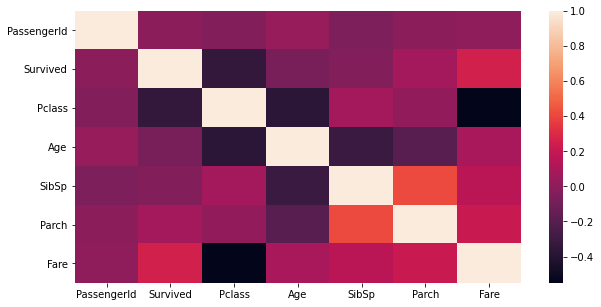

In [17]:
# Plotting Correlation Heatmap

plt.figure(figsize = (10,5))
sns.heatmap(train.corr())
plt.show()

It shows that PClass has no strong relationship with Survived.

## Trating Missing Values

In [18]:
# Looking for columns containing missings
null_col_train = train.isnull().sum()
print('Counts of Missing Values in Train Data is :''\n',null_col_train[null_col_train>0], '\n')

null_col_test = test.isnull().sum()
print('Counts of Missing Values in Test Data is: ''\n' , null_col_test[null_col_test>0])

Counts of Missing Values in Train Data is :
 Age         177
Cabin       687
Embarked      2
dtype: int64 

Counts of Missing Values in Test Data is: 
 Age       86
Fare       1
Cabin    327
dtype: int64


In [19]:
# For train Data
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Cabin'] = train['Cabin'].fillna('C') #Filling with "C" as it is most frequent after Nans
train['Embarked'] = train['Embarked'].fillna('S') # Filling with "S" as its most frequent as shown in plots

# for test Data
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Cabin'] = test['Cabin'].fillna('C')
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [20]:
# Applying Lambda function to generate a column Named "Cabin_Name" which will contain initials of Cabins

train['Cabin_Name'] = train.Cabin.apply(lambda x: str(x)[0])  
print(train['Cabin_Name'].value_counts())

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Name, dtype: int64


In [21]:
# Applying Lambda function to generate a column Named "Cabin_Name" which will contain initials of Cabins

test['Cabin_Name'] = test.Cabin.apply(lambda x: str(x)[0])  
print(test['Cabin_Name'].value_counts())

C    362
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Name, dtype: int64


Here 'n' represents a Nans values

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C,S,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C,S,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C,S,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C,S,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C,S,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C


In [23]:
# Re-Checking for Missing 
print(train.isnull().sum())
print()
print(test.isnull().sum())


print()
print()
print()
print("Perfect!!")

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_Name     0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_Name     0
dtype: int64



Perfect!!


### Treating Outliers

In [24]:
# Defining a function to get the Ranges
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)
    return (min_val, max_val)

In [25]:
# for Training Data (lookin for distributions of each columns)

print("The Range of people's Age ", minmax(train['Age']))
print('The Range of SibSp ', minmax(train['SibSp']))
print('The Range of Parch ', minmax(train['Parch']))
print('The Range of Fare ', minmax(train['Fare']))
print('The Range of Survived ', minmax(train['Survived']))
print('The Range of Pclass ', minmax(train['Pclass']))

The Range of people's Age  (0.42, 80.0)
The Range of SibSp  (0, 8)
The Range of Parch  (0, 6)
The Range of Fare  (0.0, 512.3292)
The Range of Survived  (0, 1)
The Range of Pclass  (1, 3)


In [26]:
# for test Data (lookin for distributions of each columns)

print("The Range of people's Age ", minmax(test['Age']))
print('The Range of SibSp ', minmax(test['SibSp']))
print('The Range of Parch ', minmax(test['Parch']))
print('The Range of Fare ', minmax(test['Fare']))
print('The Range of Pclass ', minmax(test['Pclass']))

The Range of people's Age  (0.17, 76.0)
The Range of SibSp  (0, 8)
The Range of Parch  (0, 9)
The Range of Fare  (0.0, 512.3292)
The Range of Pclass  (1, 3)


The Range of abowe seems geniune!! No outliers

### Feature Selection 

In [27]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Name'],
      dtype='object')

In [28]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Name'],
      dtype='object')

In [29]:
train_data = train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Cabin_Name']]
test_data = test[['PassengerId', 'Pclass','Sex', 'Age', 'SibSp', 'Parch','Embarked', 'Cabin_Name']]

#### Treating Categotical Features

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_Name
0,1,0,3,male,22.0,1,0,S,C
1,2,1,1,female,38.0,1,0,C,C
2,3,1,3,female,26.0,0,0,S,C
3,4,1,1,female,35.0,1,0,S,C
4,5,0,3,male,35.0,0,0,S,C


In [31]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_Name
0,892,3,male,34.5,0,0,Q,C
1,893,3,female,47.0,1,0,S,C
2,894,2,male,62.0,0,0,Q,C
3,895,3,male,27.0,0,0,S,C
4,896,3,female,22.0,1,1,S,C


In [32]:
train_data['nSex'] = train_data.Sex.map({'female':1, 'male':0})
test_data['nSex'] = test_data.Sex.map({'female':1, 'male':0})

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_Name,nSex
0,1,0,3,male,22.0,1,0,S,C,0
1,2,1,1,female,38.0,1,0,C,C,1
2,3,1,3,female,26.0,0,0,S,C,1
3,4,1,1,female,35.0,1,0,S,C,1
4,5,0,3,male,35.0,0,0,S,C,0


In [33]:
train_data['nEmbarked'] = train_data.Embarked.map({'S':0, 'C':1, 'Q':2})
test_data['nEmbarked'] = test_data.Embarked.map({'S':0, 'C':1, 'Q':2})

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_Name,nSex,nEmbarked
0,1,0,3,male,22.0,1,0,S,C,0,0
1,2,1,1,female,38.0,1,0,C,C,1,1
2,3,1,3,female,26.0,0,0,S,C,1,0
3,4,1,1,female,35.0,1,0,S,C,1,0
4,5,0,3,male,35.0,0,0,S,C,0,0


In [34]:
train_data['nCabin_Name'] = train_data.Cabin_Name.map({'C':0,'B':1,'D':2,'E':3,'A':4,'F':5,'G':6,'T':7})
test_data['nCabin_Name'] = test_data.Cabin_Name.map({'C':0,'B':1,'D':2,'E':3,'A':4,'F':5,'G':6,'T':7})

train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_Name,nSex,nEmbarked,nCabin_Name
0,1,0,3,male,22.000000,1,0,S,C,0,0,0
1,2,1,1,female,38.000000,1,0,C,C,1,1,0
2,3,1,3,female,26.000000,0,0,S,C,1,0,0
3,4,1,1,female,35.000000,1,0,S,C,1,0,0
4,5,0,3,male,35.000000,0,0,S,C,0,0,0
5,6,0,3,male,29.699118,0,0,Q,C,0,2,0
6,7,0,1,male,54.000000,0,0,S,E,0,0,3
7,8,0,3,male,2.000000,3,1,S,C,0,0,0
8,9,1,3,female,27.000000,0,2,S,C,1,0,0
9,10,1,2,female,14.000000,1,0,C,C,1,1,0


In [35]:
# Dropping Categorical Data
train_data.drop(['Sex', 'Embarked', 'Cabin_Name'], axis=1, inplace=True)
test_data.drop(['Sex', 'Embarked', 'Cabin_Name'], axis=1, inplace=True)

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,nSex,nEmbarked,nCabin_Name
0,1,0,3,22.0,1,0,0,0,0
1,2,1,1,38.0,1,0,1,1,0
2,3,1,3,26.0,0,0,1,0,0
3,4,1,1,35.0,1,0,1,0,0
4,5,0,3,35.0,0,0,0,0,0


In [37]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,nSex,nEmbarked,nCabin_Name
0,892,3,34.5,0,0,0,2,0
1,893,3,47.0,1,0,1,0,0
2,894,2,62.0,0,0,0,2,0
3,895,3,27.0,0,0,0,0,0
4,896,3,22.0,1,1,1,0,0


### Dropping PassengerId and Ticket column

In [38]:
train_data.drop(['PassengerId'], axis = 1, inplace = True)

### preparing training and testing data

In [46]:
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 7)
Shape of y_train (891,)
Shape of x_test (418, 7)


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

RF_model = RandomForestRegressor(random_state=0)
RF_model.fit(X_train, y_train)
preds = RF_model.predict(X_test)
predict = (preds > 0.5).astype(int).ravel()
print(predict)

[0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 0 0 1 0 0 1]


In [53]:
from sklearn import metrics
import numpy as np
Y_pred_rand = (RF_model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

Precision :  96.81
Accuracy :  94.5
Recall :  88.6
F1 score :  92.52
AUC :  93.39


In [54]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)

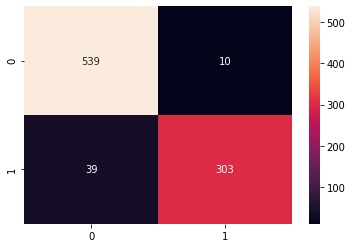

In [56]:
# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()